In [ ]:
!pip install openpyxl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

**Data Preparation**

Dataset diambil dari https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah

In [ ]:
data = pd.read_excel("/content/DATA RUMAH.xlsx")
print(data)

        NO                                         NAMA RUMAH        HARGA  \
0        1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000   
1        2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000   
2        3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000   
3        4           Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   
4        5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000   
...    ...                                                ...          ...   
1005  1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000   
1006  1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000   
1007  1008        Di Kebun Baru Rumah Terawat, Area Strategis   4000000000   
1008  1009  Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...  19000000000   
1009  1010                Dijual Rumah Kokoh Di Gudang Peluru  10500000000   

       LB   LT  KT  KM  GRS  
0     220  220   3   3    0  
1  

In [ ]:
data_out = data.pop("HARGA")
data["HARGA"] = data_out


In [ ]:
data.head()

,NO,NAMA RUMAH,LB,LT,KT,KM,GRS,HARGA
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",220,220,3,3,0,3800000000
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",180,137,4,3,2,4600000000
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",267,250,4,4,4,3000000000
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",40,25,2,2,0,430000000
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",400,355,6,5,3,9000000000


In [ ]:
data.drop(['NO', 'NAMA RUMAH'], axis=1, inplace=True)
data.head()

,LB,LT,KT,KM,GRS,HARGA
0,220,220,3,3,0,3800000000
1,180,137,4,3,2,4600000000
2,267,250,4,4,4,3000000000
3,40,25,2,2,0,430000000
4,400,355,6,5,3,9000000000


**Exploratory Data Analysis**

In [ ]:
data.dtypes

,0
LB,int64
LT,int64
KT,int64
KM,int64
GRS,int64
HARGA,int64


In [ ]:
data.shape

(1010, 6)

In [ ]:
data.describe()

,LB,LT,KT,KM,GRS,HARGA
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1.010000e+03
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7.628987e+09
std,177.864557,179.957604,1.572776,1.420066,1.510998,7.340946e+09
min,40.000000,25.000000,2.000000,1.000000,0.000000,4.300000e+08
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3.262500e+09
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5.000000e+09
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9.000000e+09
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,6.500000e+10


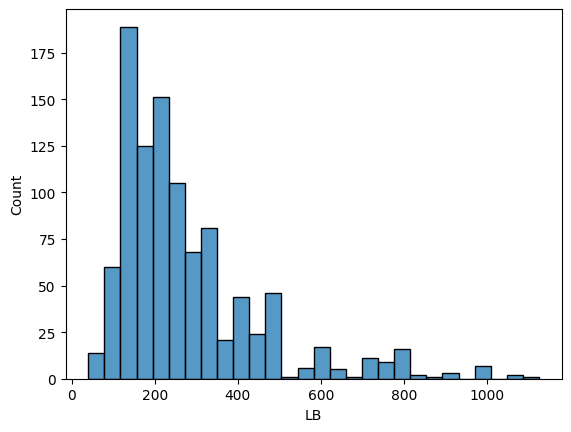

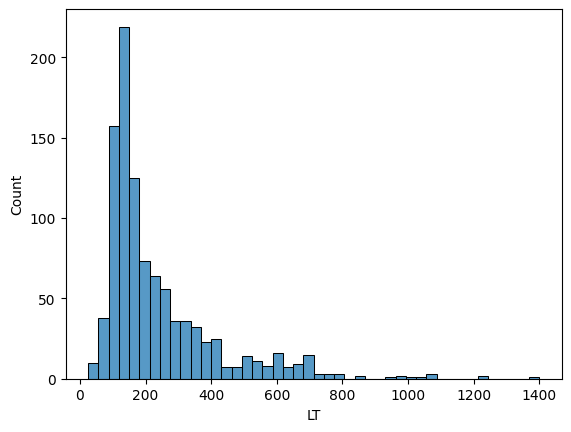

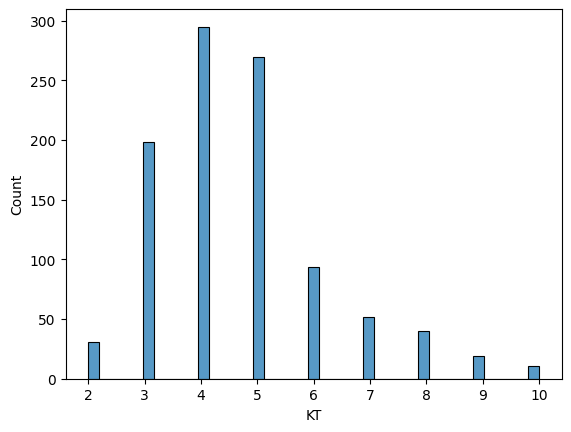

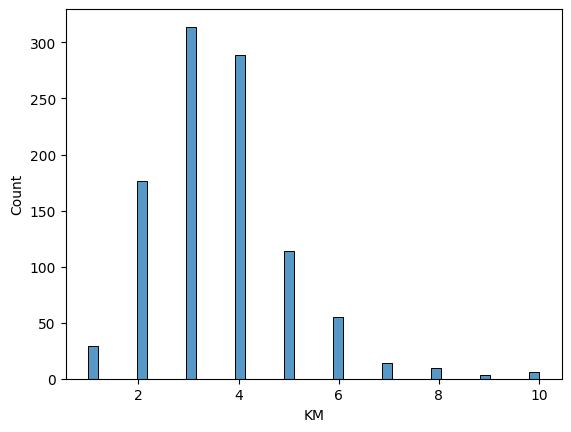

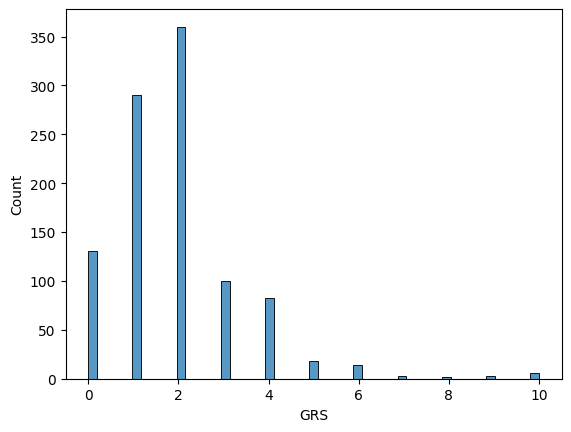

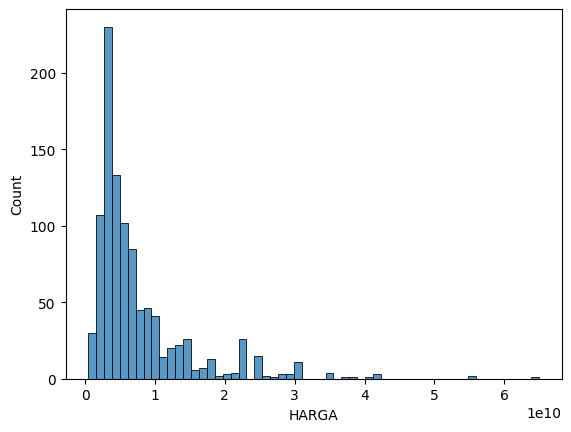

In [ ]:
for column in data.columns:
	sns.histplot(data = data, x = column)
	plt.show()

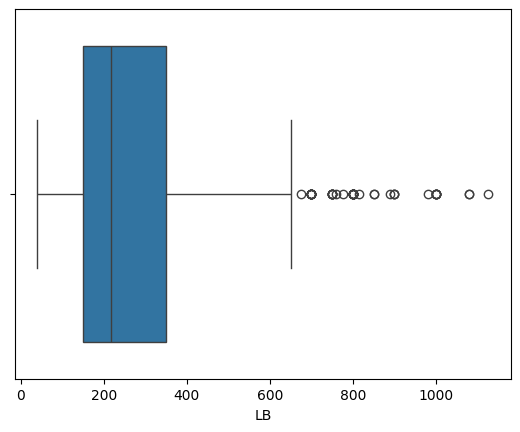

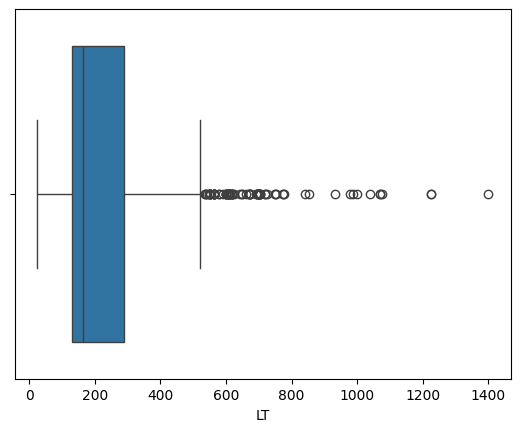

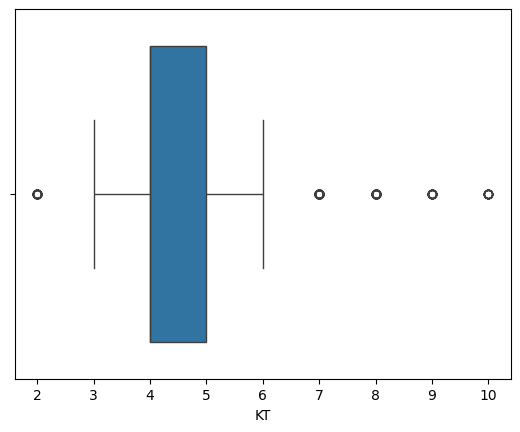

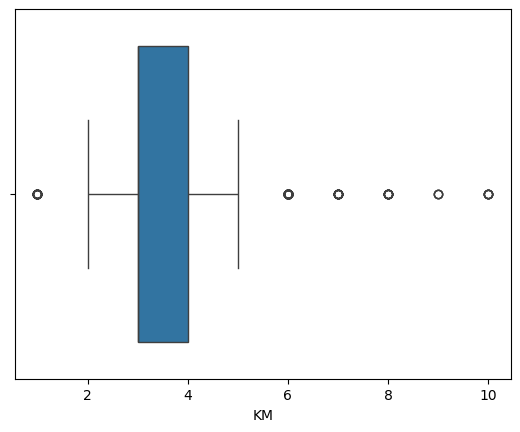

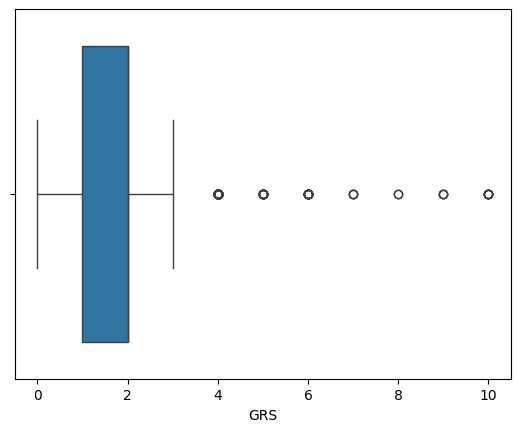

In [ ]:
for column in data.columns[:-1] :
  sns.boxplot(data = data, x = column)
  plt.show()

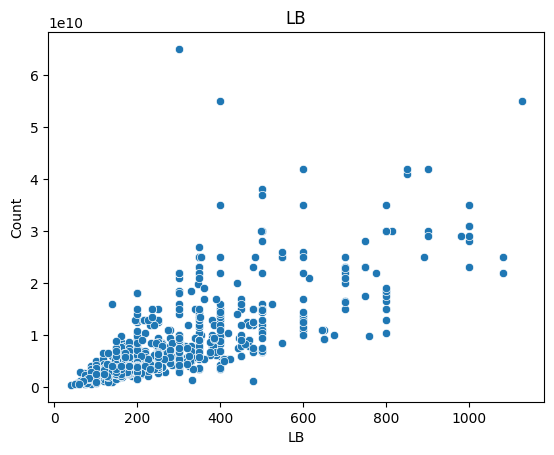

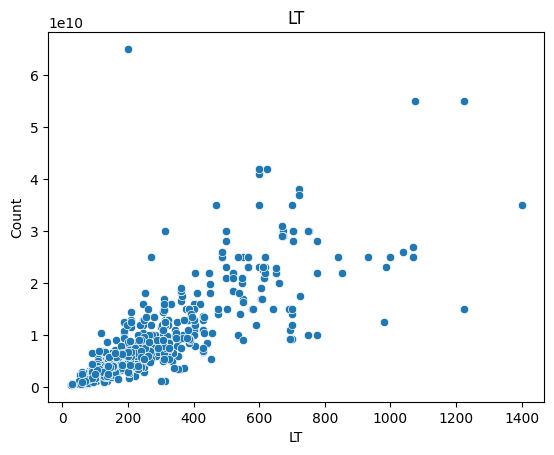

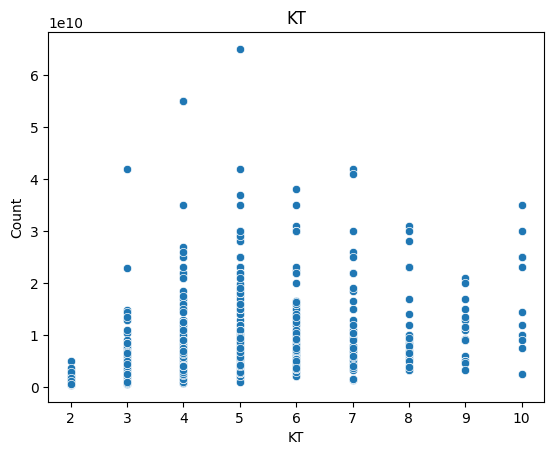

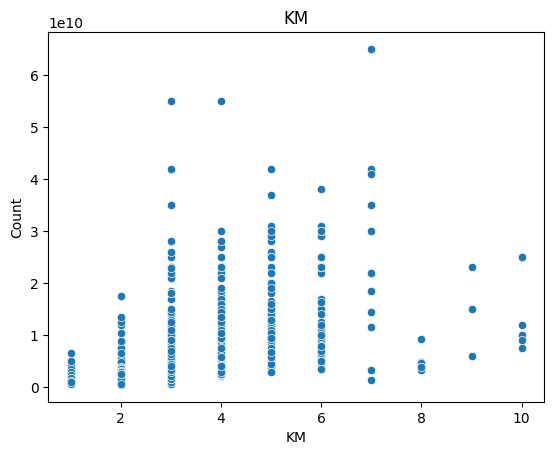

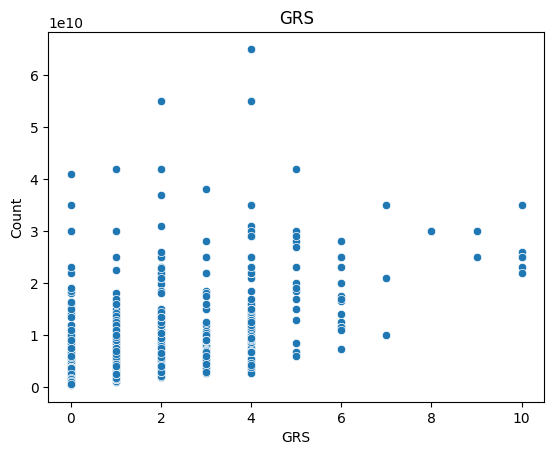

In [ ]:
for column in data.columns[:-1] :
  sns.scatterplot(data = data, x = column, y = "HARGA")
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.show()

<Axes: >

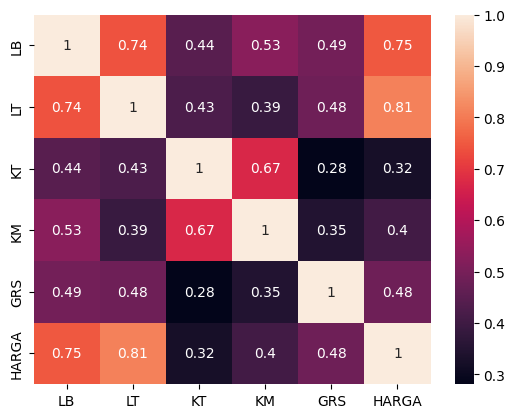

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
for column in data.columns[:-1] :
  if(data[column].dtype != "object") :
    print(f"column : {column}, skew : {data[column].skew()}, kurt : {data[column].kurt()}")

column : LB, skew : 1.8156298909452178, kurt : 3.7174991191450806
column : LT, skew : 2.1799583632193094, kurt : 6.1046740077539985
column : KT, skew : 1.017277732554179, kurt : 1.147107775337707
column : KM, skew : 1.1069690531283185, kurt : 2.6111515011114053
column : GRS, skew : 1.8031140878069816, kurt : 5.980488537298576


kolom tidak terdistribusi normal sehingga untuk menangani missing value-nya menggunakan median

**Data Preprocessing**

In [ ]:
missing_percentage = data.isna().sum() / len(data) * 100
missing_percentage

,0
LB,0.0
LT,0.0
KT,0.0
KM,0.0
GRS,0.0
HARGA,0.0


Tidak ada kolom dengan value NULL/kosong sehingga tidak ada yang perlu diubah

In [ ]:
data.dtypes

,0
LB,int64
LT,int64
KT,int64
KM,int64
GRS,int64
HARGA,int64


Tidak ada kolom yang berupa kategorikal, sehingga tidak perlu ada encoding

In [ ]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
y_train = np.reshape(y_train, (-1, 1)) # ubah menjadi 2 Dimensi
y_test = np.reshape(y_test, (-1, 1))

scaler_x_minmax = MinMaxScaler()
scaler_y_minmax = MinMaxScaler()

def scaling(x1, x2, y1, y2, scaler_x, scaler_y) :
	x1 = scaler_x.fit_transform(x1)
	x2 = scaler_x.transform(x2)
	y1 = scaler_y.fit_transform(y1)
	y2 = scaler_y.transform(y2)
	return x1, x2, y1, y2, scaler_x, scaler_y

x_train, x_test, y_train, y_test, scaler_x_minmax, scaler_y_minmax = scaling(x_train, x_test, y_train, y_test, scaler_x_minmax, scaler_y_minmax)

**Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = LinearRegression()
history = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"RMSE : {root_mean_squared_error(y_test, y_pred)}, MSE : {mean_squared_error(y_test, y_pred)}, R2_SCORE : {r2_score(y_test, y_pred)}")

RMSE : 0.04636903526051307, MSE : 0.0021500874309907047, R2_SCORE : 0.7558057855480035


In [ ]:
model2 = Ridge(alpha=1.0)
history = model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(f"RMSE : {root_mean_squared_error(y_test, y_pred2)}, MSE : {mean_squared_error(y_test, y_pred2)}, R2_SCORE : {r2_score(y_test, y_pred2)}")

RMSE : 0.04642229754670193, MSE : 0.0021550297095145276, R2_SCORE : 0.755244470782691


In [ ]:
model3 = SVR()
history = model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(f"RMSE : {root_mean_squared_error(y_test, y_pred3)}, MSE : {mean_squared_error(y_test, y_pred3)}, R2_SCORE : {r2_score(y_test, y_pred3)}")

RMSE : 0.054267510808797624, MSE : 0.002944962729382967, R2_SCORE : 0.6655285501758788


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model4 = RandomForestRegressor()
history = model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print(f"RMSE : {root_mean_squared_error(y_test, y_pred4)}, MSE : {mean_squared_error(y_test, y_pred4)}, R2_SCORE : {r2_score(y_test, y_pred4)}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE : 0.03525623440386153, MSE : 0.0012430020643400296, R2_SCORE : 0.8588271768446816


In [ ]:
import pickle

In [ ]:
filename = 'random_forest_model.pkl'
pickle.dump(model4, open(filename, 'wb'))

In [ ]:
filename_scaler_x = 'scaler_x_minmax.pkl'
pickle.dump(scaler_x_minmax, open(filename_scaler_x, 'wb'))

filename_scaler_y = 'scaler_y_minmax.pkl'
pickle.dump(scaler_y_minmax, open(filename_scaler_y, 'wb'))

In [ ]:
import math

# Data yang akan diprediksi
data_untuk_prediksi = np.array([[230, 300, 4, 3, 1]])

# Skalakan data input menggunakan scaler yang sama
data_untuk_prediksi_scaled = scaler_x_minmax.transform(data_untuk_prediksi)

# Lakukan prediksi dengan data yang sudah diskalakan
harga_prediksi_scaled = model4.predict(data_untuk_prediksi_scaled)

# Balikkan hasil prediksi ke skala aslinya menggunakan scaler y
harga_prediksi_asli = scaler_y_minmax.inverse_transform(harga_prediksi_scaled.reshape(-1, 1))

print("Luas bangunan = 230\nLuas Tanah = 300\nJumlah Kamar = 4\nJumlah Toilet = 3\nLuas Garasi = 1(mobil)")
print("Perkiraan harga rumah = IDR {:,}".format(math.floor(harga_prediksi_asli[0][0])))

Luas bangunan = 230
Luas Tanah = 300
Jumlah Kamar = 4
Jumlah Toilet = 3
Luas Garasi = 1(mobil)
Perkiraan harga rumah = IDR 8,870,000,000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
